In [1]:
import os

import numpy as np
np.set_printoptions(precision=2)
import torch
import matplotlib.pyplot as plt

from bmadx import Particle
from bmadx.plot import plot_projections

from stats import (
    read_all_particles,
    show_cov_stats,
    plot_projections_with_contours
)

In [2]:
dr = os.path.join('data', 'non_gaussian_beam')

In [3]:
gt = torch.load(os.path.join(dr, 'stats', 'non_gaussian_beam.pt')).numpy_particles()

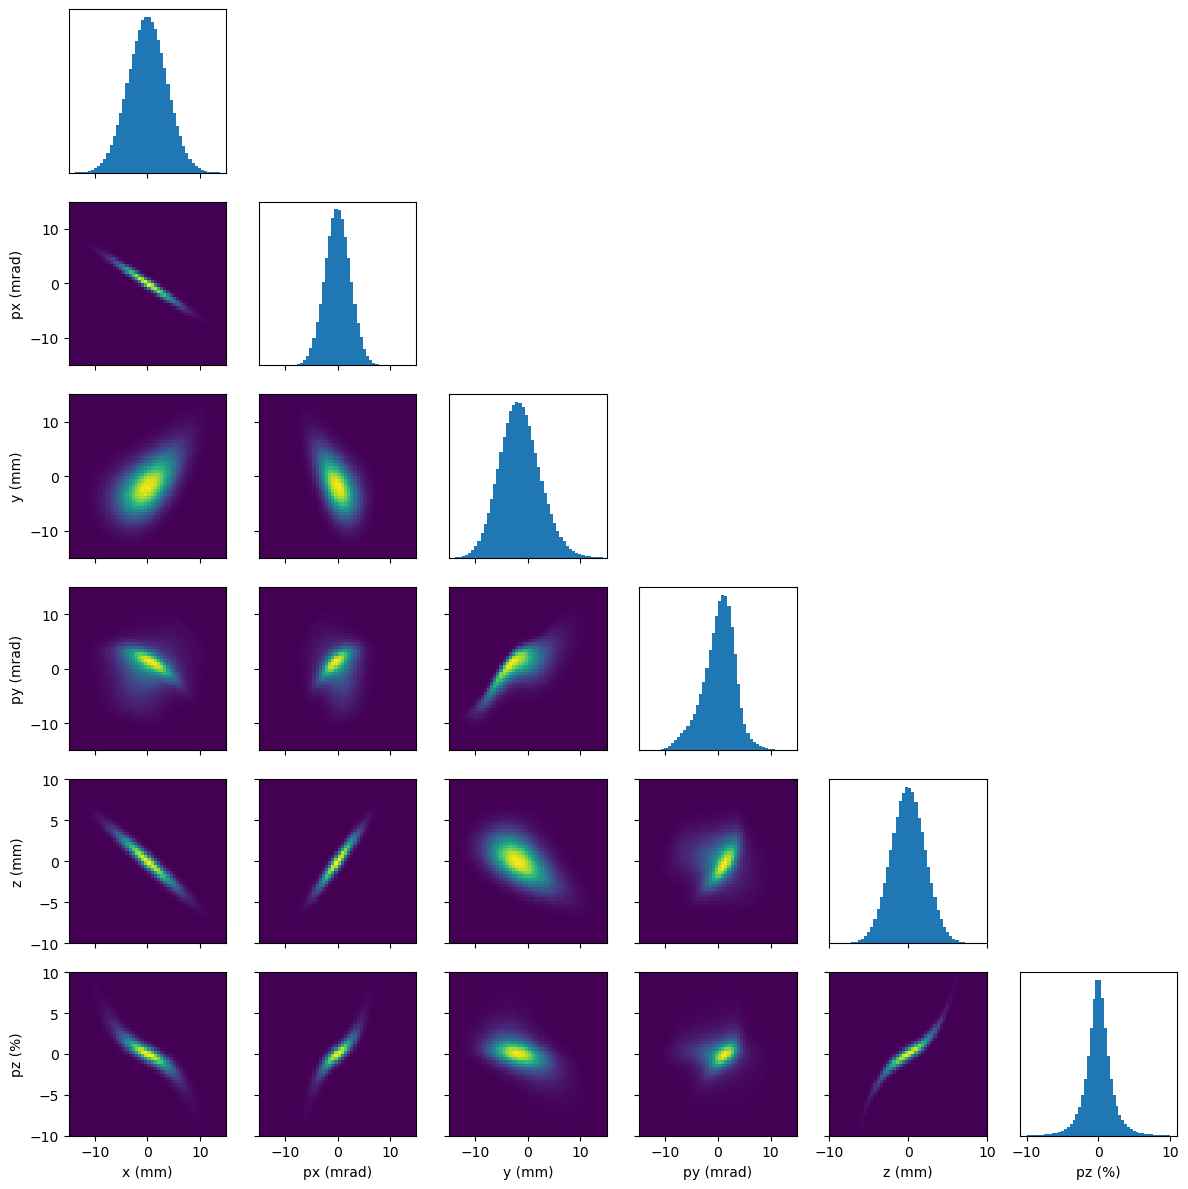

In [4]:
# plot gt:
lims = np.array([
    [-15e-3,15e-3],
    [-15e-3,15e-3],
    [-15e-3,15e-3],
    [-15e-3,15e-3],
    [-10e-3,10e-3],
    [-10e-2,10e-2]
])
plot_projections(gt, custom_lims=lims)
plt.show()

In [5]:
pars = read_all_particles(
    dr = os.path.join(dr, 'stats'),
    n_beams = 100, 
    n_par = 100_000
)

In [6]:
par_concat = np.swapaxes(pars, 0, 1).reshape((6, 100_000*100))

In [7]:
r_avg = Particle(
    *par_concat,
    p0c = gt.p0c,
    s = gt.s,
    mc2 = gt.mc2
)

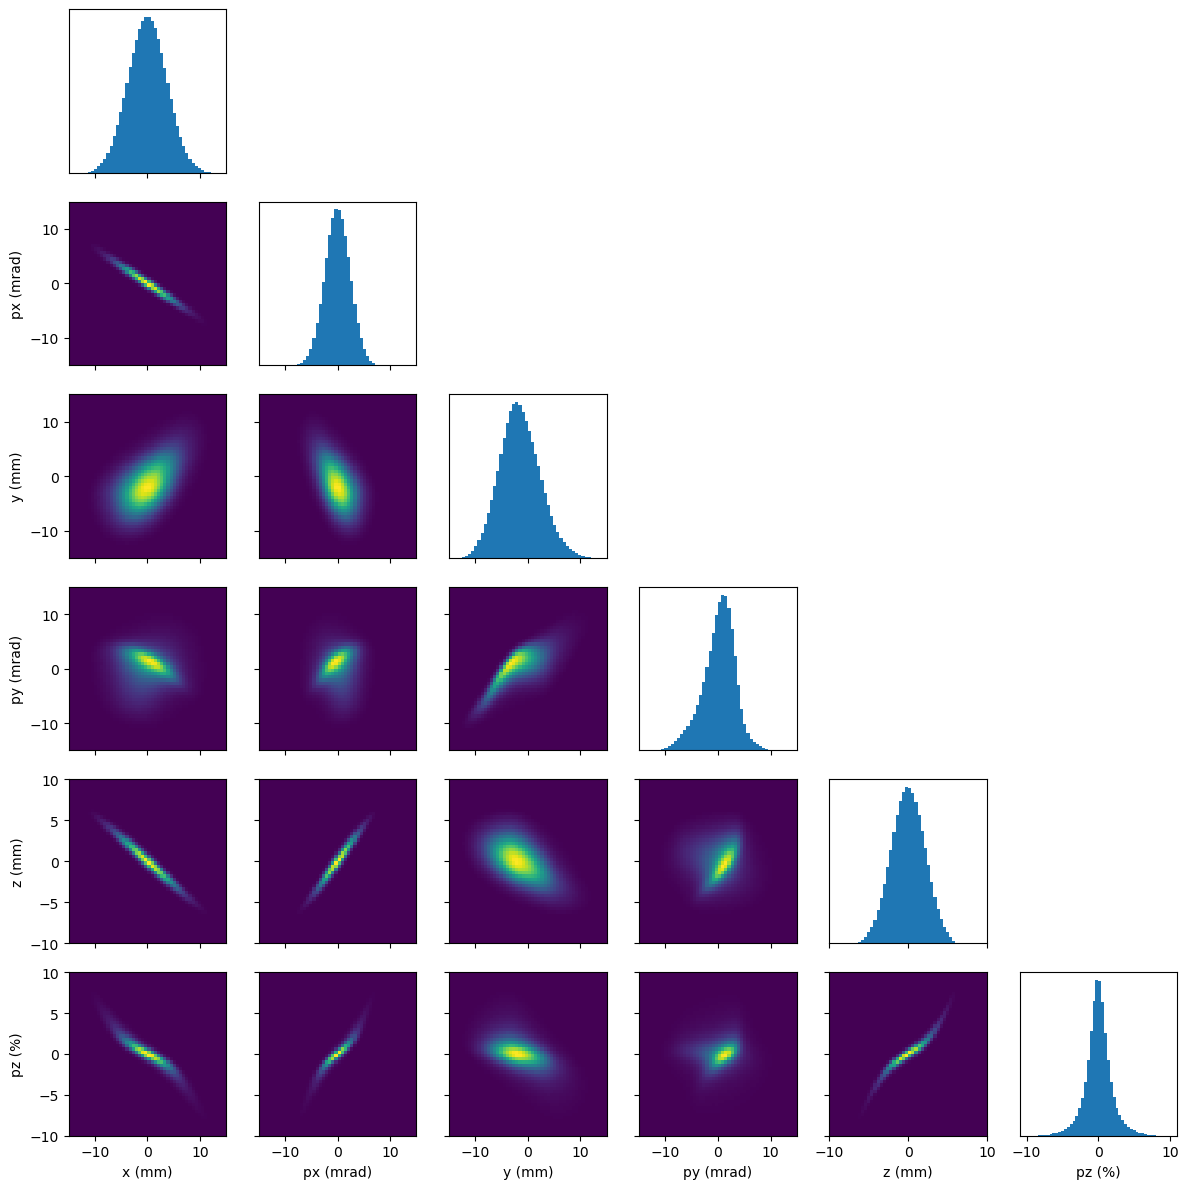

In [8]:
plot_projections(r_avg, custom_lims=lims)
plt.show()

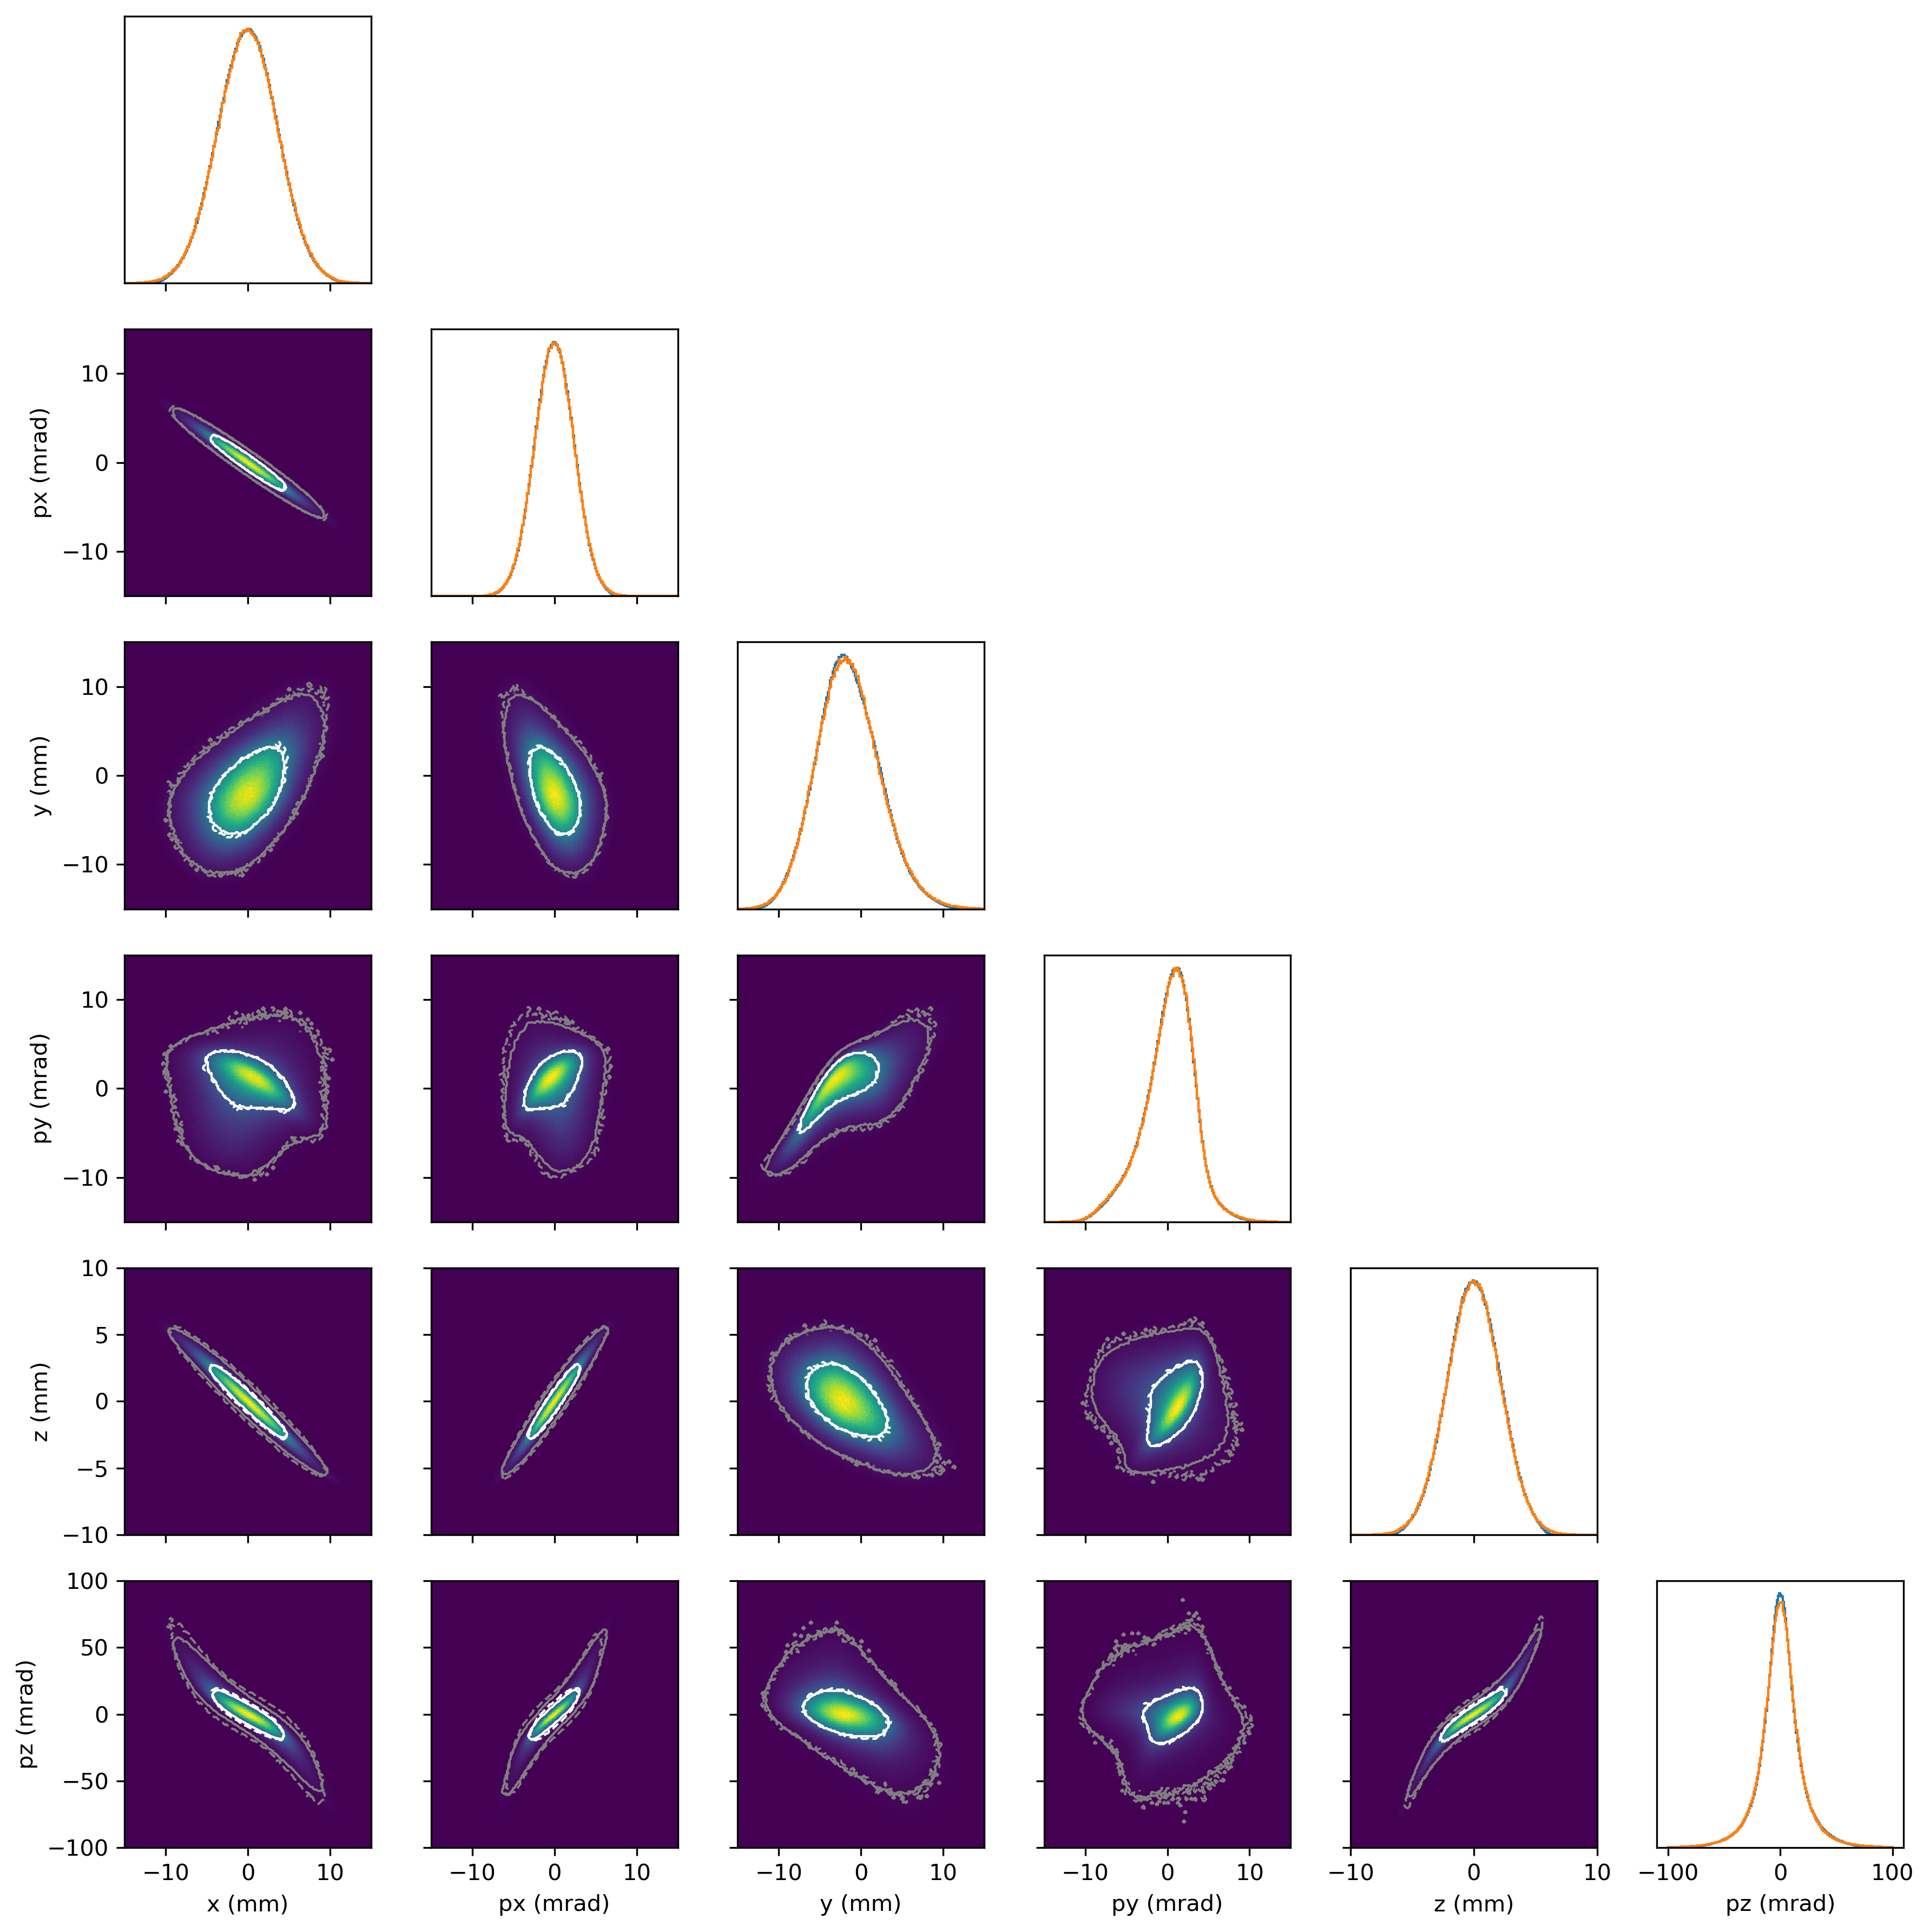

In [9]:
plot_projections_with_contours(
    r_avg,
    gt,
    bins=200,
    contour_percentiles = [50, 95],
    custom_lims=lims,
    contour_smoothing_r=0.5,
    contour_smoothing_gt=0.5
)
plt.show()

ground truth: 
[[ 10.96  -7.01   6.81  -0.54  -6.24 -49.76]
 [ -7.01   4.62  -4.37   0.34   4.04  32.25]
 [  6.81  -4.37  11.02   5.64  -3.93 -31.03]
 [ -0.54   0.34   5.64   6.02   0.31   2.71]
 [ -6.24   4.04  -3.93   0.31   3.74  29.88]
 [-49.76  32.25 -31.03   2.71  29.88 258.59]]

reconstruction avg: 
[[ 10.37  -6.64   6.36  -0.41  -5.91 -45.99]
 [ -6.64   4.41  -4.06   0.29   3.84  30.19]
 [  6.36  -4.06  11.09   5.91  -3.69 -28.55]
 [ -0.41   0.29   5.91   6.3    0.34   2.56]
 [ -5.91   3.84  -3.69   0.34   3.5   27.26]
 [-45.99  30.19 -28.55   2.56  27.26 223.83]]

reconstruction std: 
[[ 0.61  0.39  0.59  0.35  0.35  2.92]
 [ 0.39  0.26  0.39  0.21  0.23  1.89]
 [ 0.59  0.39  0.74  0.49  0.33  2.57]
 [ 0.35  0.21  0.49  0.43  0.2   1.58]
 [ 0.35  0.23  0.33  0.2   0.21  1.75]
 [ 2.92  1.89  2.57  1.58  1.75 16.32]]

reconstruction relative uncertainty: 
[[ 0.06 -0.06  0.09 -0.86 -0.06 -0.06]
 [-0.06  0.06 -0.1   0.72  0.06  0.06]
 [ 0.09 -0.1   0.07  0.08 -0.09 -0.09]
 [-0.86 

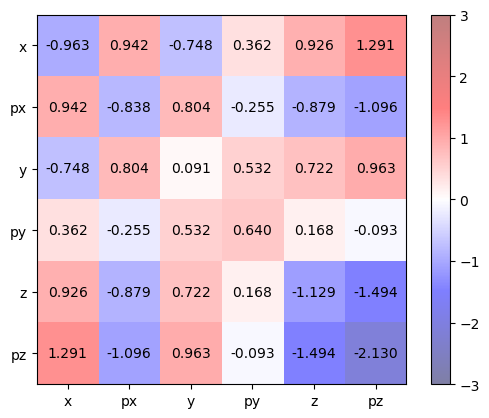

In [10]:
show_cov_stats(pars, gt, beam_fraction=0.5)

ground truth: 
[[ 12.02  -7.66   6.85  -0.71  -6.77 -55.52]
 [ -7.66   5.12  -4.39   0.46   4.41  36.11]
 [  6.85  -4.39  13.66   8.29  -3.94 -32.25]
 [ -0.71   0.46   8.29   9.12   0.41   3.34]
 [ -6.77   4.41  -3.94   0.41   4.12  33.83]
 [-55.52  36.11 -32.25   3.34  33.83 307.48]]

reconstruction avg: 
[[ 11.63  -7.42   6.4   -0.54  -6.6  -53.05]
 [ -7.42   4.97  -4.06   0.38   4.29  34.98]
 [  6.4   -4.06  13.49   8.33  -3.7  -29.86]
 [ -0.54   0.38   8.33   9.15   0.47   3.34]
 [ -6.6    4.29  -3.7    0.47   3.93  31.65]
 [-53.05  34.98 -29.86   3.34  31.65 273.19]]

reconstruction std: 
[[ 0.35  0.23  0.41  0.28  0.21  1.92]
 [ 0.23  0.16  0.3   0.16  0.14  1.3 ]
 [ 0.41  0.3   0.57  0.43  0.21  1.91]
 [ 0.28  0.16  0.43  0.44  0.16  1.38]
 [ 0.21  0.14  0.21  0.16  0.13  1.1 ]
 [ 1.92  1.3   1.91  1.38  1.1  12.36]]

reconstruction relative uncertainty: 
[[ 0.03 -0.03  0.06 -0.51 -0.03 -0.04]
 [-0.03  0.03 -0.07  0.43  0.03  0.04]
 [ 0.06 -0.07  0.04  0.05 -0.06 -0.06]
 [-0.51 

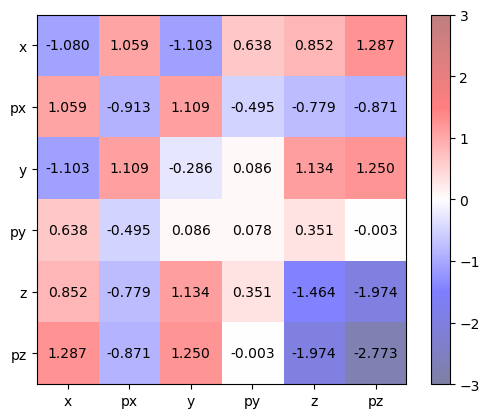

In [11]:
show_cov_stats(pars, gt, beam_fraction=0.95)

ground truth: 
[[ 13.56  -8.66   7.81  -0.57  -7.69 -69.25]
 [ -8.66   5.78  -5.02   0.37   5.    45.06]
 [  7.81  -5.02  15.11   9.07  -4.52 -40.69]
 [ -0.57   0.37   9.07   9.94   0.33   2.71]
 [ -7.69   5.    -4.52   0.33   4.69  42.25]
 [-69.25  45.06 -40.69   2.71  42.25 434.98]]

reconstruction avg: 
[[ 13.09  -8.37   7.18  -0.51  -7.43 -63.29]
 [ -8.37   5.6   -4.57   0.36   4.84  41.72]
 [  7.18  -4.57  14.28   8.65  -4.16 -35.51]
 [ -0.51   0.36   8.65   9.56   0.46   3.4 ]
 [ -7.43   4.84  -4.16   0.46   4.42  37.64]
 [-63.29  41.72 -35.51   3.4   37.64 345.47]]

reconstruction std: 
[[ 0.33  0.21  0.37  0.28  0.19  1.71]
 [ 0.21  0.16  0.28  0.17  0.13  1.21]
 [ 0.37  0.28  0.51  0.36  0.2   1.9 ]
 [ 0.28  0.17  0.36  0.39  0.16  1.37]
 [ 0.19  0.13  0.2   0.16  0.14  1.06]
 [ 1.71  1.21  1.9   1.37  1.06 10.98]]

reconstruction relative uncertainty: 
[[ 0.03 -0.03  0.05 -0.53 -0.03 -0.03]
 [-0.03  0.03 -0.06  0.46  0.03  0.03]
 [ 0.05 -0.06  0.04  0.04 -0.05 -0.05]
 [-0.53 

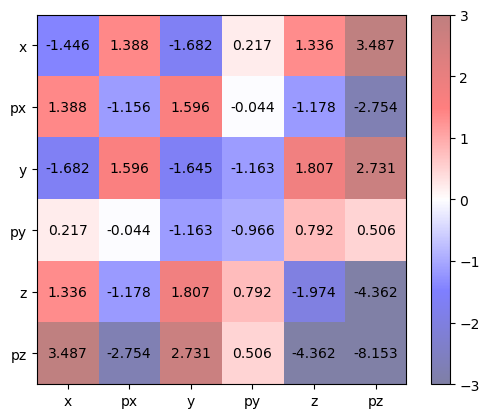

In [12]:
np.set_printoptions(precision=2, suppress=True)
show_cov_stats(pars, gt, beam_fraction=1.0)